#Tomato leaf disease prediction

In [19]:
# Workimng on Google colab
import numpy as np  
import pandas as pd  
import os

In [21]:
!pip install tensorflow-gpu

In [22]:
# Importing the path of train and test data from google drive
image_size=[224,224]
train_path='/content/drive/MyDrive/Tomato/train'
test_path='/content/drive/MyDrive/Tomato/valid'

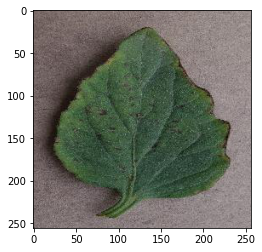

In [45]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/Tomato/valid/Tomato___Bacterial_spot/0296e043-c805-47e4-bce5-b2326048ac67___GCREC_Bact.Sp 5680.JPG"))


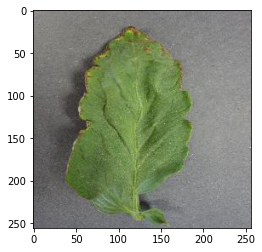

In [46]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/Tomato/valid/Tomato___Bacterial_spot/8173d1ee-3fb4-493d-80d2-73ff608b8467___UF.GRC_BS_Lab Leaf 0501.JPG"))


In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [24]:
# Import the inception V3 library as shown below and add preprocessing layer to the front of inception
# Here using imagenet weights
inception = InceptionV3(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [25]:
#don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [26]:
#getting number of output classes
folders = glob('/content/drive/MyDrive/Tomato/train/*')

In [27]:
folders

['/content/drive/MyDrive/Tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Tomato/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Tomato/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Tomato/train/Tomato___healthy',
 '/content/drive/MyDrive/Tomato/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Tomato/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Tomato/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Tomato/train/Tomato___Bacterial_spot']

In [28]:
# our layers - we can add more
x = Flatten()(inception.output)

In [29]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [30]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [31]:
# assigning cost and optimization method 
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
# Using Image Data Generator to import the images from the data folder-Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18373 images belonging to 10 classes.


In [34]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4595 images belonging to 10 classes.


In [35]:
# fit the model
# executing with less no of epochs , bcz it will take time
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1149/1149 [==============================] - 5196s 5s/step - loss: 4.1022 - accuracy: 0.6807 - val_loss: 3.5584 - val_accuracy: 0.7362
Epoch 2/5
1149/1149 [==============================] - 2585s 2s/step - loss: 3.5144 - accuracy: 0.7859 - val_loss: 6.9943 - val_accuracy: 0.7295
Epoch 3/5
1149/1149 [==============================] - 2624s 2s/step - loss: 3.2808 - accuracy: 0.8183 - val_loss: 2.7138 - val_accuracy: 0.8409
Epoch 4/5
1149/1149 [==============================] - 2600s 2s/step - loss: 3.3030 - accuracy: 0.8360 - val_loss: 4.2106 - val_accuracy: 0.8181
Epoch 5/5
1149/1149 [==============================] - 2562s 2s/step - loss: 3.0621 - accuracy: 0.8498 - val_loss: 4.6588 - val_accuracy: 0.8091


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
#r = model.fit_generator(
#  training_set,
#  validation_data=test_set,
#  epochs=10,
#  steps_per_epoch=len(training_set),
#  validation_steps=len(test_set)
#)

In [38]:
import matplotlib.pyplot as plt

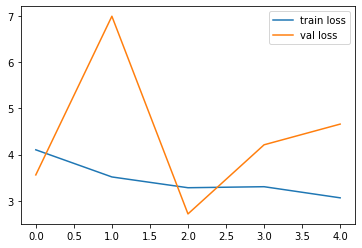

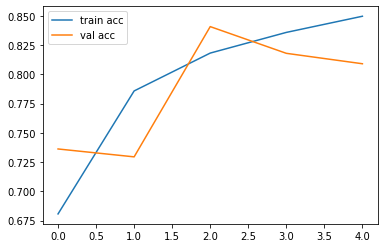

<Figure size 432x288 with 0 Axes>

In [39]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [40]:
#predict
y_pred = model.predict(test_set)

In [41]:
y_pred

array([[0.0000000e+00, 3.7504176e-26, 5.1311348e-29, ..., 3.0853301e-24,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 9.9999988e-01, 1.1473204e-28, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.8741196e-17, 0.0000000e+00],
       ...,
       [9.9999952e-01, 0.0000000e+00, 5.8241007e-22, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.7099387e-24, 3.3637484e-20, 3.2316767e-21, ..., 3.5182398e-31,
        2.4573878e-27, 0.0000000e+00],
       [7.0531397e-36, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.3940835e-30]], dtype=float32)

In [42]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [43]:
y_pred

array([9, 1, 5, ..., 0, 4, 8])

In [51]:
model.save("tomato1.model")

INFO:tensorflow:Assets written to: tomato1.model/assets


In [53]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("tomato1.model")

In [57]:
class_dict = training_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [59]:
# find disease using image path
prediction = model.predict([prepare("/content/drive/MyDrive/Tomato/valid/Tomato___Bacterial_spot/7e3bff88-4160-4ba5-bbe1-6c1eedb6c7c1___UF.GRC_BS_Lab Leaf 0858.JPG")])
np.argmax(prediction)
if np.argmax(prediction) == 0:
    print("Bacterial_spot")
elif np.argmax(prediction) == 1:
    print("Early_Blight")
elif np.argmax(prediction) == 2:
    print("Late Blight")
elif np.argmax(prediction) == 3:
    print("Leaf Mold")
elif np.argmax(prediction) == 4:
    print("Septoria Leaf Mold")
elif np.argmax(prediction) == 5:
    print("Spider mites")
elif np.argmax(prediction) == 6:
    print("Target Spot")
elif np.argmax(prediction) == 7:
    print("Yellow Leaf Curl Virus")
elif np.argmax(prediction) == 8:
    print("Mosaic Virus")
else:
    print("Healthy")

Bacterial_spot
